# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [200]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [201]:
# 检查数据维度
data.shape

(112915, 11)

In [202]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,112915.0,0.067449,0.250799,0.0,0.000000,0.000000,0.000000,1.000000e+00
RevolvingUtilizationOfUnsecuredLines,112915.0,5.825057,254.976948,0.0,0.034371,0.173016,0.570906,5.070800e+04
age,108648.0,51.361304,14.453571,0.0,41.000000,51.000000,62.000000,1.030000e+02
NumberOfTime30-59DaysPastDueNotWorse,112915.0,0.378807,3.521621,0.0,0.000000,0.000000,0.000000,9.800000e+01
DebtRatio,112915.0,0.306221,0.222926,0.0,0.133458,0.278272,0.440113,9.999094e-01
MonthlyIncome,112915.0,6959.808892,14781.925949,1.0,3637.000000,5600.000000,8416.000000,3.008750e+06
NumberOfOpenCreditLinesAndLoans,112915.0,8.675561,5.124575,0.0,5.000000,8.000000,11.000000,5.700000e+01
NumberOfTimes90DaysLate,112915.0,0.213594,3.489531,0.0,0.000000,0.000000,0.000000,9.800000e+01
NumberRealEstateLoansOrLines,112915.0,1.015587,1.080925,0.0,0.000000,1.000000,2.000000,2.900000e+01
NumberOfTime60-89DaysPastDueNotWorse,112915.0,0.188531,3.472207,0.0,0.000000,0.000000,0.000000,9.800000e+01


In [203]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [204]:
# 清除缺失值
data.dropna(inplace=True)
data.drop(data[data['age'] == 0].index, inplace=True)
data.shape


(108647, 11)

In [205]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,108647.0,0.067429,0.250765,0.0,0.000000,0.000000,0.000000,1.000000e+00
RevolvingUtilizationOfUnsecuredLines,108647.0,5.989741,259.793611,0.0,0.034318,0.172894,0.570853,5.070800e+04
age,108647.0,51.361777,14.452797,21.0,41.000000,51.000000,62.000000,1.030000e+02
NumberOfTime30-59DaysPastDueNotWorse,108647.0,0.378630,3.525296,0.0,0.000000,0.000000,0.000000,9.800000e+01
DebtRatio,108647.0,0.306236,0.222925,0.0,0.133492,0.278308,0.440113,9.999094e-01
MonthlyIncome,108647.0,6964.377203,14924.255901,1.0,3640.000000,5600.000000,8416.000000,3.008750e+06
NumberOfOpenCreditLinesAndLoans,108647.0,8.679080,5.128137,0.0,5.000000,8.000000,11.000000,5.700000e+01
NumberOfTimes90DaysLate,108647.0,0.213490,3.493382,0.0,0.000000,0.000000,0.000000,9.800000e+01
NumberRealEstateLoansOrLines,108647.0,1.015316,1.077679,0.0,0.000000,1.000000,2.000000,2.900000e+01
NumberOfTime60-89DaysPastDueNotWorse,108647.0,0.188666,3.476211,0.0,0.000000,0.000000,0.000000,9.800000e+01


In [206]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742938139111065

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [207]:
# 提示：查看train_test_split函数
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

SeriousDlqin2yrs
0    30434
1     2161
Name: count, dtype: int64

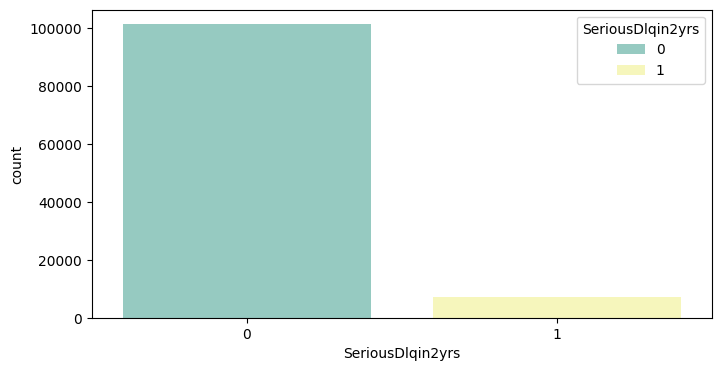

In [208]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
plt.figure(figsize=(8,4))
sns.countplot(x="SeriousDlqin2yrs", data=data, hue="SeriousDlqin2yrs", palette="Set3", ) # 灰度柱状图
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

#### 2.数据预处理之离散化

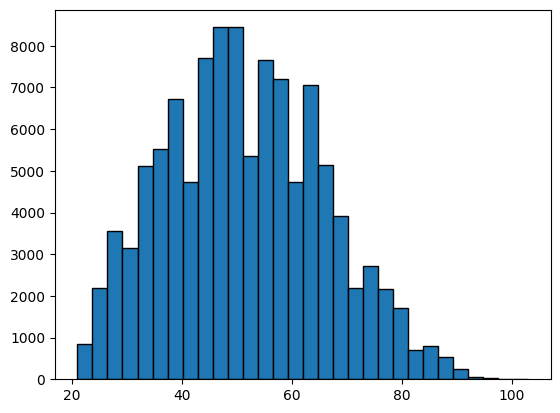

In [209]:
plt.hist(data['age'], bins=30, edgecolor='black')
plt.show()

In [210]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)

start_age = int(min(data['age']))
end_age = int(max(data['age']) + 4)

bins = list(range(start_age, end_age, 3))
data['age_binned'] = pd.cut(data['age'], bins=bins)


#### 3.数据预处理之独热向量编码

In [211]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
age_dummies = pd.get_dummies(data['age_binned']).astype(int)

data.drop(['age', 'age_binned'], axis=1, inplace=True)
data = pd.concat([data, age_dummies], axis=1)
data.columns = data.columns.astype(str)
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"(21, 24]","(24, 27]","(27, 30]","(30, 33]","(33, 36]","(36, 39]","(39, 42]","(42, 45]","(45, 48]","(48, 51]","(51, 54]","(54, 57]","(57, 60]","(60, 63]","(63, 66]","(66, 69]","(69, 72]","(72, 75]","(75, 78]","(78, 81]","(81, 84]","(84, 87]","(87, 90]","(90, 93]","(93, 96]","(96, 99]","(99, 102]","(102, 105]"
0,1,0.766127,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.957151,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.658180,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.233810,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.907239,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112910,0,0.385742,0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112911,0,0.040674,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
112912,0,0.299745,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112913,0,0.000000,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [212]:
# # 取出对应的X和y
# y = data['SeriousDlqin2yrs']
# X = data.drop('SeriousDlqin2yrs', axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 4.数据预处理之幅度缩放

In [213]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [214]:
print(X_train_std.mean())  # 瞅一眼训练集的平均值
print(X_train_std.std())   # 瞅一眼训练集的方差
print(X_test_std.mean())  # 瞅一眼测试集的平均值
print(X_test_std.std())   # 瞅一眼测试集的方差

4.0249015221881236e-17
1.0
0.0007817974630914358
0.967031421297781


#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [215]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression
# 初始化模型！
lr = LogisticRegression(C=100.0**40, random_state=0, penalty='l2') 
# 学习吧！
lr.fit(X_train_std, y_train)

y_train_pred = lr.predict(np.array(X_train_std))  # 训练集上的预测！
y_test_pred = lr.predict(np.array(X_test_std))         # 测试集上预测吧！

# 测试集预测不对的样本数
print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum()) 

from sklearn.metrics import accuracy_score
print('(accuracy_score) Training accuracy: %.4f' % accuracy_score(y_train, y_train_pred)) # 训练集的正确率
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率
# 斜率
print('Sloop: ' + str(lr.coef_[0])[1:len(str(lr.coef_[0])) - 1])
# 截距
# print('Intercept: %.3f' % lr.intercept_)
print('Intercept: %.3f' % lr.intercept_[0])


Misclassified samples in test set: 2145
(accuracy_score) Training accuracy: 0.9330
(accuracy_score) Test accuracy: 0.9342
Sloop: -0.01249366 -0.35968825  1.73213649  0.30585117 -0.16343234 -0.10447827
  1.68299749 -0.19003752 -3.24876383  0.11576025
Intercept: -2.861


In [216]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[30356    78]
 [ 2067    94]]


In [217]:
# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_test, y_test_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

TP: 94
TN: 30356
FP: 78
FN: 2067


Text(0, 0.5, 'Frequency')

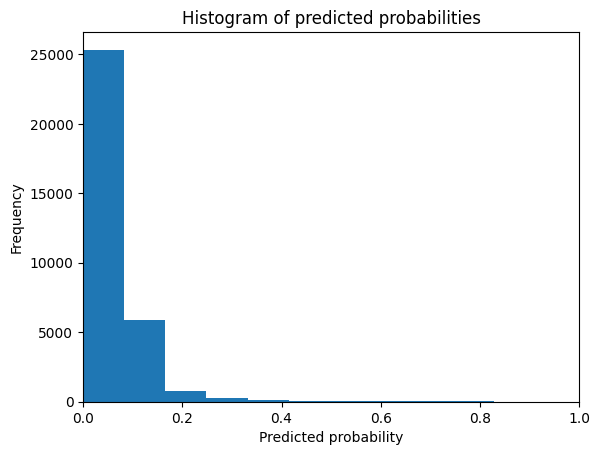

In [218]:
# store the predicted probabilities for class 1
y_pred_prob = lr.predict_proba(X_test_std)[:, 1]

# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=12)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

In [219]:
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob.reshape(-1, 1), threshold=0.2)[:,0]

y_pred_prob[70:80], y_pred_class[70:80]

(array([0.04865951, 0.02366832, 0.02627105, 0.08614594, 0.04657338,
        0.10146346, 0.03949657, 0.0819293 , 0.10769039, 0.05936303]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [220]:
y_test.values[70:80]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [221]:
# new confusion matrix (threshold of 0.2)
print(confusion_matrix(y_test, y_pred_class))

[[29866   568]
 [ 1764   397]]


In [222]:
print(recall_score(y_test, y_pred_class))

0.18371124479407683


#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [223]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score

# 初始化模型
lr = LogisticRegression(random_state=0)

# 定义要搜索的参数网格
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [1, 10, 100, 500],
    'solver': ['liblinear']  # liblinear求解器支持l1和l2正则化
}

# 初始化GridSearchCV
grid = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='recall', cv=5)

# 对模型进行网格搜索
grid.fit(X_train_std, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 10, 100, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='recall')

In [224]:
# 输出最好的超参数
# 输出最好的模型
print("Best Parameters: ", grid.best_params_)
print("Best Score: ", grid.best_score_)

# 使用最佳参数和模型
best_lr = grid.best_estimator_

Best Parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score:  0.04569215876089061


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [225]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score
# 对训练集和测试集进行预测
y_train_pred = best_lr.predict(X_train_std)
y_test_pred = best_lr.predict(X_test_std)

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, f1_score

# 计算训练集上的指标
accuracy_train = accuracy_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
auc_train = roc_auc_score(y_train, best_lr.predict_proba(X_train_std)[:, 1])
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
f1_score_train = f1_score(y_train, y_train_pred)

# 输出训练集的评分
print("Training Scores:")
print(f"Accuracy: {accuracy_train}")
print(f"Recall: {recall_train}")
print(f"AUC: {auc_train}")
print(f"Confusion Matrix:\n{conf_matrix_train}")
print(f"F1 Score: {f1_score_train}")

# 计算测试集上的指标
accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
auc_test = roc_auc_score(y_test, best_lr.predict_proba(X_test_std)[:, 1])
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
f1_score_test = f1_score(y_test, y_test_pred)

# 输出测试集的评分
print("\nTest Scores:")
print(f"Accuracy: {accuracy_test}")
print(f"Recall: {recall_test}")
print(f"AUC: {auc_test}")
print(f"Confusion Matrix:\n{conf_matrix_test}")
print(f"F1 Score: {f1_score_test}")


Training Scores:
Accuracy: 0.9330458107610582
Recall: 0.04433688286544046
AUC: 0.705451648630312
Confusion Matrix:
[[70731   156]
 [ 4936   229]]
F1 Score: 0.08252252252252253

Test Scores:
Accuracy: 0.934223040343611
Recall: 0.04349838037945396
AUC: 0.6937810396607924
Confusion Matrix:
[[30357    77]
 [ 2067    94]]
F1 Score: 0.08061749571183534


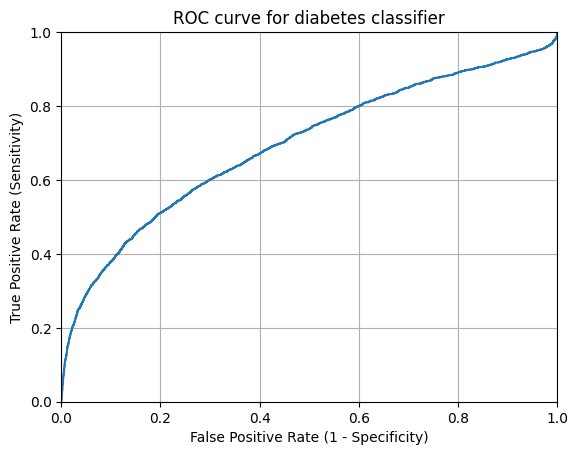

In [226]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [227]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

evaluate_threshold(0.5)

Sensitivity: 0.04349838037945396
Specificity: 0.997502792928961


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [228]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标

evaluate_threshold(0.3)

Sensitivity: 0.10689495603887089
Specificity: 0.9927383847013209


In [229]:
evaluate_threshold(0.1)

Sensitivity: 0.4090698750578436
Specificity: 0.8814812380889794


#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [230]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel
from sklearn.ensemble import RandomForestClassifier

feat_labels = data.columns[1:]

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train_std[:10000,:], y_train[:10000])

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

 1) RevolvingUtilizationOfUnsecuredLines 0.178793
 2) MonthlyIncome                  0.161846
 3) NumberOfOpenCreditLinesAndLoans 0.151786
 4) NumberOfTime30-59DaysPastDueNotWorse 0.120143
 5) NumberOfTimes90DaysLate        0.090663
 6) NumberRealEstateLoansOrLines   0.084222
 7) DebtRatio                      0.067769
 8) NumberOfDependents             0.058786
 9) (21, 24]                       0.048576
10) NumberOfTime60-89DaysPastDueNotWorse 0.037415


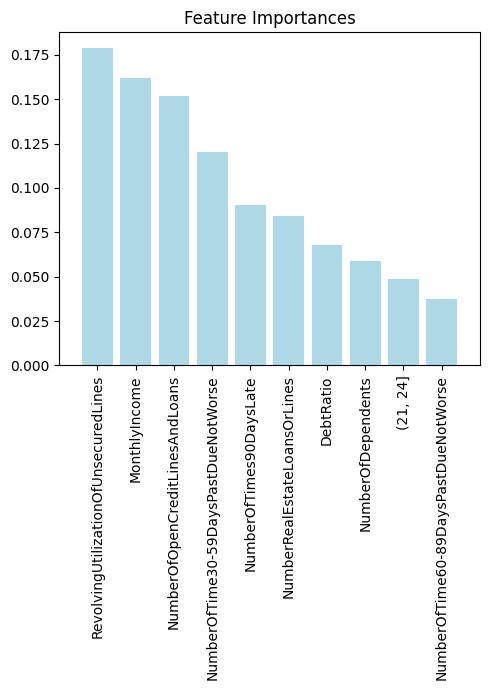

In [231]:
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train_std[:10000,:].shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))
    
plt.figure(figsize=(5,7))
plt.title('Feature Importances')
plt.bar(range(X_train_std[:10000,:].shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train_std[:10000,:].shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_std[:10000,:].shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

In [232]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.15, prefit=True)
X_selected_train_std = sfm.transform(X_train_std)
X_selected_test_std = sfm.transform(X_test_std)

X_selected_train_std.shape

(76052, 3)

In [234]:
from sklearn.linear_model import LogisticRegression
# 初始化模型！
lr = LogisticRegression(C=100.0**40, random_state=0, penalty='l2') 
# 学习吧！
lr.fit(X_selected_train_std, y_train)

y_train_pred = lr.predict(np.array(X_selected_train_std))  # 训练集上的预测！
y_test_pred = lr.predict(np.array(X_selected_test_std))         # 测试集上预测吧！

# 测试集预测不对的样本数
print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum()) 

from sklearn.metrics import accuracy_score
print('(accuracy_score) Training accuracy: %.4f' % accuracy_score(y_train, y_train_pred)) # 训练集的正确率
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率
# 斜率
print('Sloop: ' + str(lr.coef_[0])[1:len(str(lr.coef_[0])) - 1])
# 截距
print('Intercept: %.3f' % lr.intercept_)

Misclassified samples in test set: 2161
(accuracy_score) Training accuracy: 0.9321
(accuracy_score) Test accuracy: 0.9337
Sloop: -0.00776728  0.18913983 -0.82097835
Intercept: -2.673


C:\Users\DS Meng\AppData\Local\Temp\ipykernel_114068\155478432.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Intercept: %.3f' % lr.intercept_)


In [235]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[30434     0]
 [ 2161     0]]


Text(0, 0.5, 'Frequency')

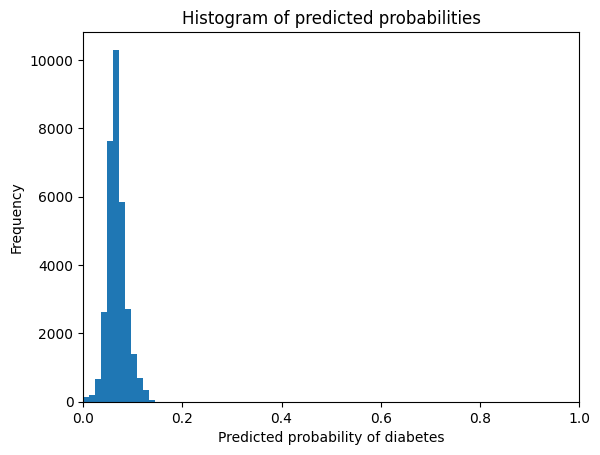

In [236]:
# store the predicted probabilities for class 1
y_selected_pred_prob = lr.predict_proba(X_selected_test_std)[:, 1]

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# histogram of predicted probabilities
plt.hist(y_selected_pred_prob, bins=12)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [239]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
# 初始化模型！
rf = RandomForestClassifier() 
# 学习吧！
rf.fit(X_selected_train_std, y_train)

y_train_pred = rf.predict(np.array(X_selected_train_std))  # 训练集上的预测！
y_test_pred = rf.predict(np.array(X_selected_test_std))         # 测试集上预测吧！

# 测试集预测不对的样本数
print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum()) 
print('(accuracy_score) Training accuracy: %.4f' % accuracy_score(y_train, y_train_pred)) # 训练集的正确率
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率
print(confusion_matrix(y_test, y_test_pred))

Misclassified samples in test set: 2309
(accuracy_score) Training accuracy: 0.9986
(accuracy_score) Test accuracy: 0.9292
[[30183   251]
 [ 2058   103]]


In [240]:
# 支持向量机
from sklearn.svm import SVC
# 初始化模型！
svc = SVC() 
# 学习吧！
svc.fit(X_selected_train_std, y_train)

y_train_pred = svc.predict(np.array(X_selected_train_std))  # 训练集上的预测！
y_test_pred = svc.predict(np.array(X_selected_test_std))         # 测试集上预测吧！

# 测试集预测不对的样本数
print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum()) 
print('(accuracy_score) Training accuracy: %.4f' % accuracy_score(y_train, y_train_pred)) # 训练集的正确率
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率
print(confusion_matrix(y_test, y_test_pred))

Misclassified samples in test set: 2161
(accuracy_score) Training accuracy: 0.9321
(accuracy_score) Test accuracy: 0.9337
[[30434     0]
 [ 2161     0]]


In [241]:
# K最近邻
from sklearn.neighbors import KNeighborsClassifier
# 初始化模型！
knn = KNeighborsClassifier() 
# 学习吧！
knn.fit(X_selected_train_std, y_train)

y_train_pred = knn.predict(np.array(X_selected_train_std))  # 训练集上的预测！
y_test_pred = knn.predict(np.array(X_selected_test_std))         # 测试集上预测吧！

# 测试集预测不对的样本数
print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum()) 
print('(accuracy_score) Training accuracy: %.4f' % accuracy_score(y_train, y_train_pred)) # 训练集的正确率
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率
print(confusion_matrix(y_test, y_test_pred))


Misclassified samples in test set: 2284
(accuracy_score) Training accuracy: 0.9337
(accuracy_score) Test accuracy: 0.9299
[[30296   138]
 [ 2146    15]]
